#1-Libraries


In [1]:
import pandas as pd # for data manipulation and cleaning
import seaborn as sns # for data visualisation in form of graphs
import matplotlib.pyplot as plt # also for data visualisation
import numpy as np # can be used here to fill outliers

#2-Loading a Dataset using Pandas

In [ ]:
df = pd.read_csv("/content/BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


#3-Understanding the Dataset

In [ ]:
df.shape # tells about rows and columns

(207755, 12)

In [ ]:
df.info() # tells us about the different columns present in dataset and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207755 entries, 0 to 207754
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     207755 non-null  int64  
 1   Product_ID                  207754 non-null  object 
 2   Gender                      207754 non-null  object 
 3   Age                         207754 non-null  object 
 4   Occupation                  207754 non-null  float64
 5   City_Category               207754 non-null  object 
 6   Stay_In_Current_City_Years  207754 non-null  object 
 7   Marital_Status              207754 non-null  float64
 8   Product_Category_1          207754 non-null  float64
 9   Product_Category_2          143312 non-null  float64
 10  Product_Category_3          63603 non-null   float64
 11  Purchase                    207754 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 19.0+ MB


In [ ]:
df.dtypes # this will tell if column is integer or string

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,float64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,float64
Product_Category_1,float64
Product_Category_2,float64


In [ ]:
df.columns #will  give all columns present in dataset

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

#unique()

In [ ]:
df.nunique()# tell all unique values in each column(such as there is only 3 city category A,B,C)


,0
User_ID,5889
Product_ID,3473
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,18
Product_Category_2,17


In [ ]:
df["City_Category"].unique() # this will give unique values in city_categoory

array(['A', 'C', 'B', nan], dtype=object)

#value_counts()

In [ ]:
df['City_Category'].value_counts().sort_values() # value counts will five each value of each unique category
#this tells that City B have more numbner of purchases and city A have least

,count
City_Category,
A,56392
C,63974
B,87388


In [ ]:
df["Gender"].value_counts() # this tells male is more than female for sure

,count
Gender,
M,156618
F,51136


In [ ]:
df.describe() #this will give all statistical computations of all columns

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,2.077550e+05,207754.000000,207754.000000,207754.000000,143312.000000,63603.000000,207754.000000
mean,1.002896e+06,8.083190,0.409701,5.291633,9.847745,12.649466,9317.681696
std,2.810441e+03,6.541428,0.491780,3.742556,5.084360,4.125545,4974.187727
min,1.000000e+02,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001354e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5857.000000
50%,1.002878e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8059.000000
75%,1.004386e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12062.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


#4-Preprocessing and Cleaning the Dataset

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
207750,1001996,P00010842,M,36-45,0.0,C,3,0.0,8.0,16.0,NaN,10021.0
207751,1001996,P00076542,M,36-45,0.0,C,3,0.0,4.0,5.0,9.0,764.0
207752,1001996,P00001042,M,36-45,0.0,C,3,0.0,1.0,2.0,16.0,11654.0
207753,1001997,P00193542,M,26-35,0.0,A,0,1.0,1.0,2.0,NaN,11419.0


#Checking for null values

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,1
Gender,1
Age,1
Occupation,1
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category_1,1
Product_Category_2,64443


#Now total rows are 537577 and total null values are 373299,166986 so if i used dropna() its gonna remove almost 70-80 percent of my data as its gonna remove all rows so instead of removing rows im gonna remove columns because i dont need it for analysis here

In [ ]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,1
Gender,1
Age,1
Occupation,1
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category_1,1
Purchase,1


#Checking for Outliers for numeric columns

<Axes: ylabel='Product_Category_1'>

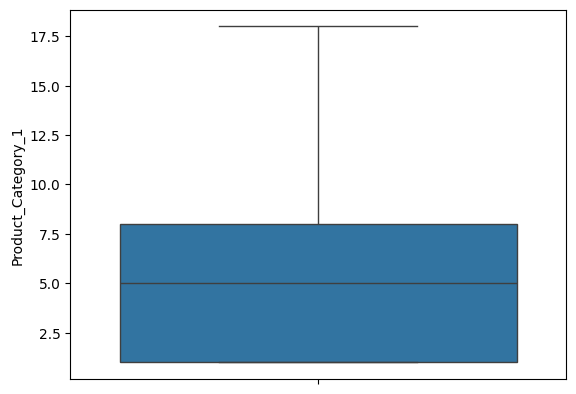

In [ ]:
sns.boxplot(df["Product_Category_1"])

<Axes: ylabel='Purchase'>

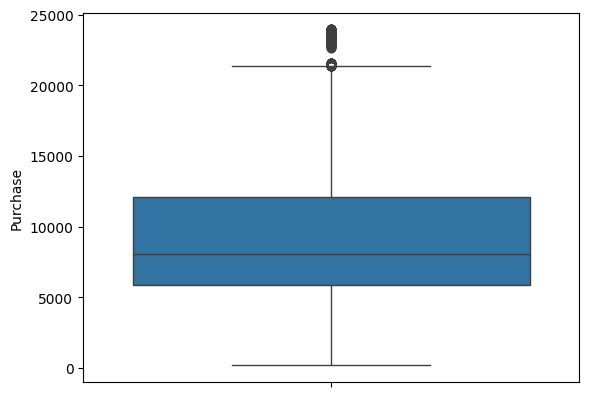

In [ ]:
sns.boxplot(df["Purchase"])

#We found the outliers in "Purchase column so we gonna figure it out and remove it by figuring out the distribution"

<ipython-input-41-ddd8064061c0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Purchase"])


<Axes: xlabel='Purchase', ylabel='Density'>

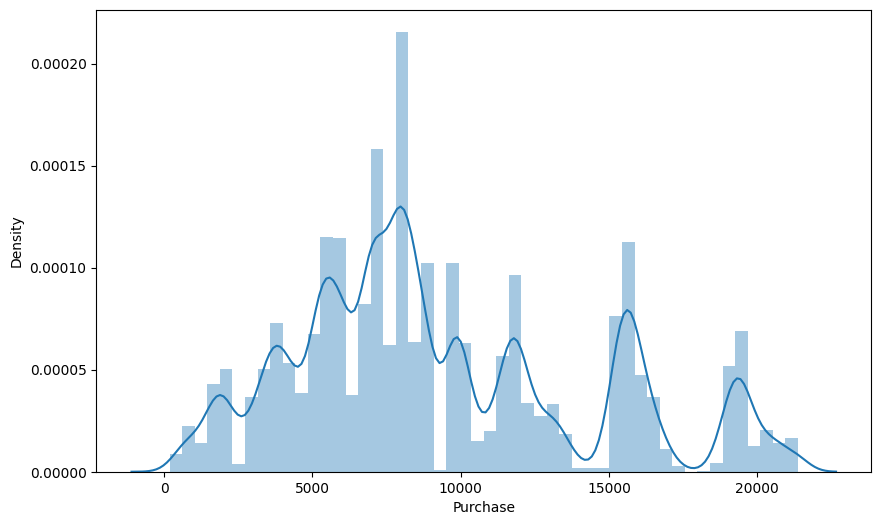

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df["Purchase"])

#Since graph above is Skewed Right so we can use IQR to find and remove the outlier

In [ ]:
Q1 = df["Purchase"].quantile(0.25)
Q3=df["Purchase"].quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
print(lower,upper)

-3450.5 21369.5


#Figuring Out the outliers

In [ ]:
df[(df["Purchase"]>upper)| (df["Purchase"]<lower)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
343,1000058,P00117642,M,26-35,2.0,B,3,0.0,10.0,23603.0
375,1000062,P00119342,F,36-45,3.0,A,1,0.0,10.0,23792.0
652,1000126,P00087042,M,18-25,9.0,B,1,0.0,10.0,23233.0
736,1000139,P00159542,F,26-35,20.0,C,2,0.0,10.0,23595.0
1041,1000175,P00052842,F,26-35,2.0,B,1,0.0,10.0,23341.0
...,...,...,...,...,...,...,...,...,...,...
206965,1001899,P00052842,F,46-50,6.0,A,1,1.0,10.0,23442.0
206987,1001899,P00087042,F,46-50,6.0,A,1,1.0,10.0,23877.0
207168,1001926,P00117642,F,0-17,0.0,B,1,0.0,10.0,23772.0
207455,1001960,P00052842,M,46-50,7.0,B,3,1.0,10.0,23483.0


In [ ]:
df.rename(columns={"Stay_In_Current_City_Years":"Years_in_City"},inplace=True)

#Capping the outlier with upper and lower

In [ ]:
df["Purchase"] = np.where(df["Purchase"]>upper,upper,np.where(df["Purchase"]<lower,lower,df["Purchase"]))

#Boxplot after removing outliers

<Axes: ylabel='Purchase'>

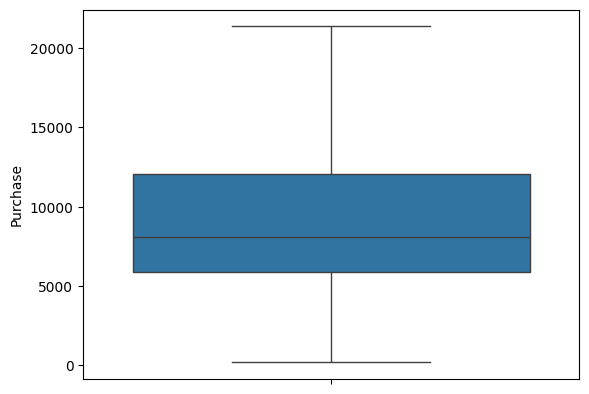

In [ ]:
sns.boxplot(df["Purchase"])

#5-Analysing and Visualising the Columns and Scenario

<Axes: title={'center': 'Total purchases by male/Female'}, xlabel='Gender'>

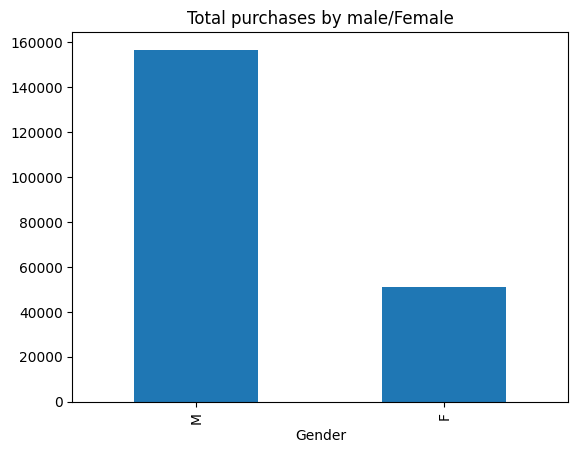

In [ ]:
df["Gender"].value_counts().plot(kind="bar",title="Total purchases by male/Female")


#Analysing Gender vs Purchases

<Axes: title={'center': 'Total purchases by male/Female'}, ylabel='Purchase'>

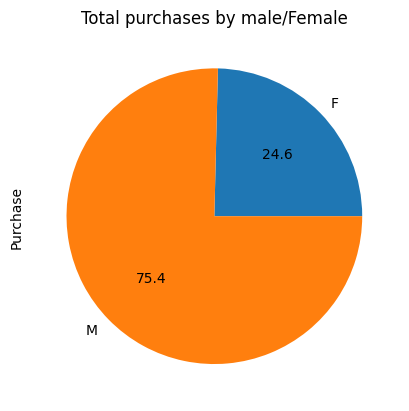

In [ ]:
df.groupby("Gender")["Purchase"].size().plot(kind="pie",autopct="%.1f",title="Total purchases by male/Female")

<Axes: title={'center': 'Total money spend my male/Female'}, ylabel='Purchase'>

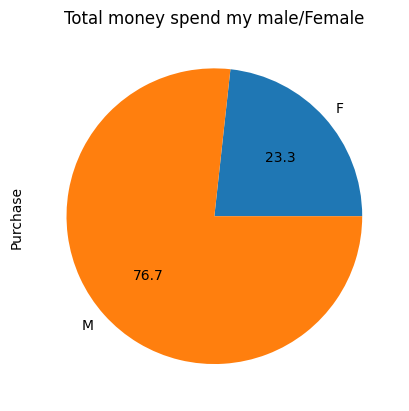

In [ ]:
df.groupby("Gender")["Purchase"].sum().plot(kind="pie",autopct="%.1f",title="Total money spend my male/Female")

<Axes: title={'center': 'Average money spend by male/Female'}, ylabel='Purchase'>

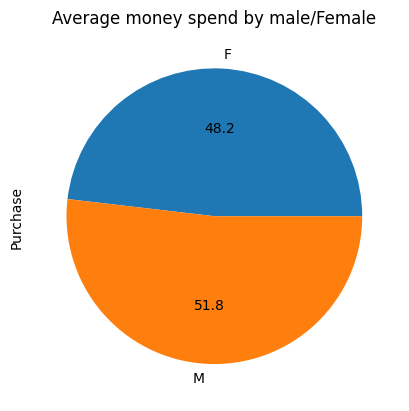

In [ ]:
df.groupby("Gender")["Purchase"].mean().plot(kind="pie",autopct="%.1f",title = "Average money spend by male/Female")

<Axes: xlabel='Age', ylabel='count'>

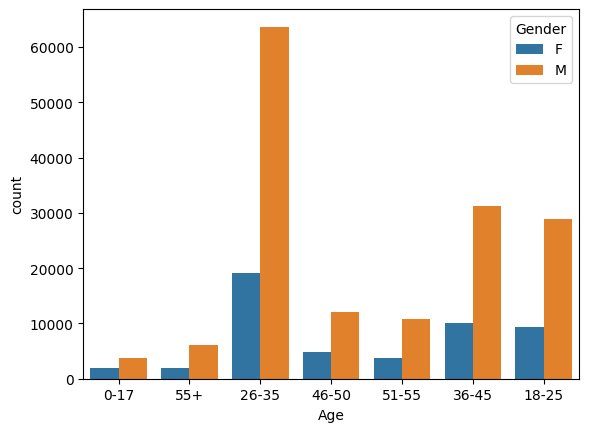

In [ ]:
sns.countplot(x="Age",hue="Gender",data=df)

<Axes: xlabel='City_Category', ylabel='count'>

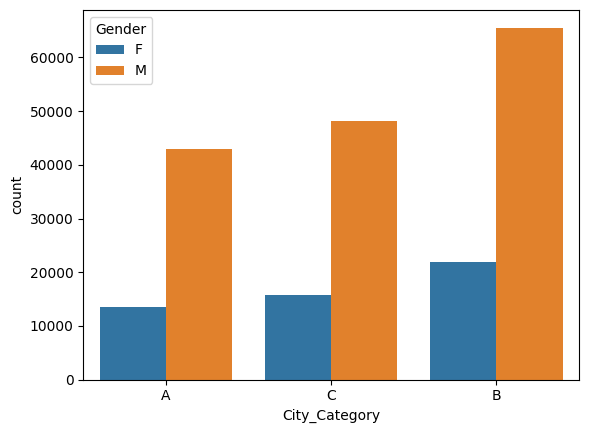

In [ ]:
sns.countplot(x="City_Category",hue="Gender",data=df)

<Axes: xlabel='Gender', ylabel='count'>

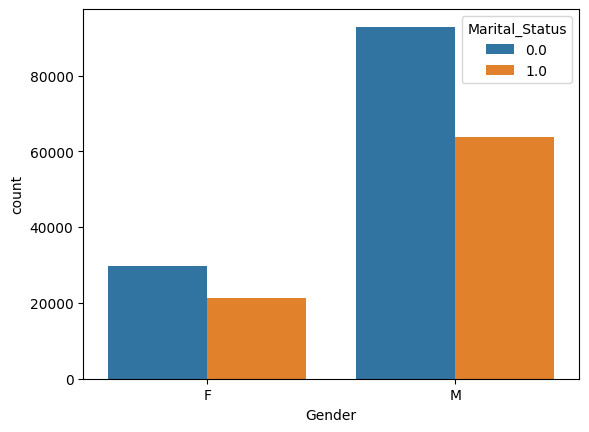

In [ ]:
sns.countplot(x="Gender",hue="Marital_Status",data=df)

<Axes: title={'center': 'Status of men and women in Black Friday sale'}, xlabel='Gender,Marital_Status'>

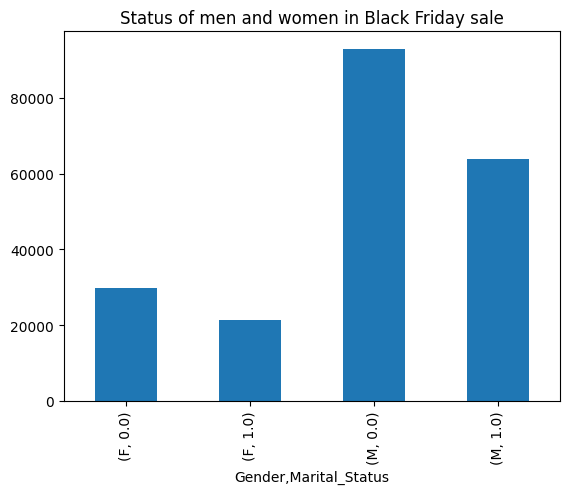

In [ ]:
df.groupby("Gender")["Marital_Status"].value_counts().plot(kind="bar",title = "Status of men and women in Black Friday sale")

<Axes: xlabel='Years_in_City', ylabel='count'>

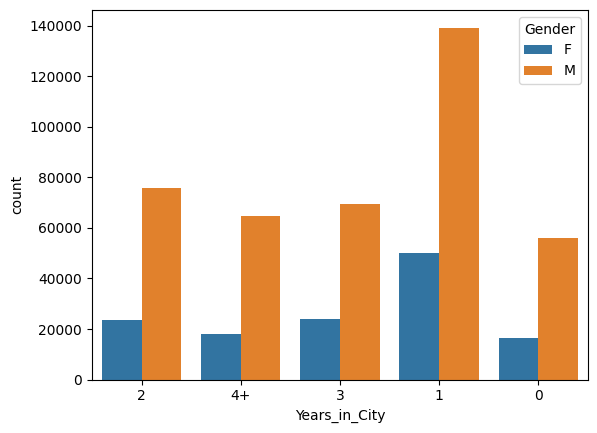

In [ ]:
sns.countplot(x="Years_in_City",hue = "Gender",data=df)

#Combining 2 columns to make analysis between 3 columns

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_City,Marital_Status,Product_Category_1,Purchase,Martial_Gender
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0,F_0.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0,F_0.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0,F_0.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0,F_0.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0,M_0.0
...,...,...,...,...,...,...,...,...,...,...,...
207750,1001996,P00010842,M,36-45,0.0,C,3,0.0,8.0,10021.0,M_0.0
207751,1001996,P00076542,M,36-45,0.0,C,3,0.0,4.0,764.0,M_0.0
207752,1001996,P00001042,M,36-45,0.0,C,3,0.0,1.0,11654.0,M_0.0
207753,1001997,P00193542,M,26-35,0.0,A,0,1.0,1.0,11419.0,M_1.0


In [ ]:
sns.countplot(x="Gender",hue ="")

In [ ]:
df["Martial_Gender"] = df["Gender"] + '_'+ df["Marital_Status"].astype("str")

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_City,Marital_Status,Product_Category_1,Purchase,Martial_Gender
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0,F_0.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0,F_0.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0,F_0.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0,F_0.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0,M_0.0


<Axes: xlabel='Martial_Gender', ylabel='count'>

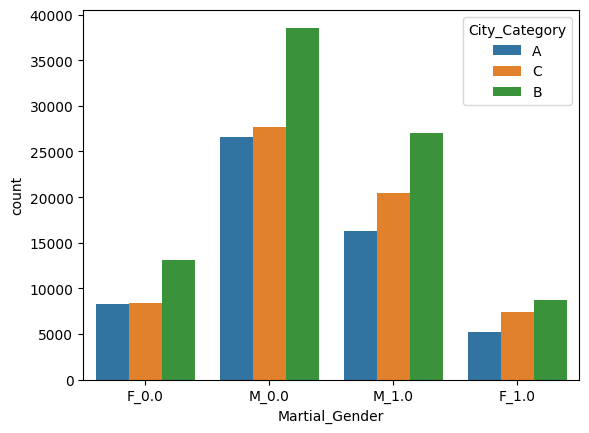

In [ ]:
sns.countplot(x = "Martial_Gender",hue = "City_Category",data=df)

<Axes: xlabel='Years_in_City', ylabel='count'>

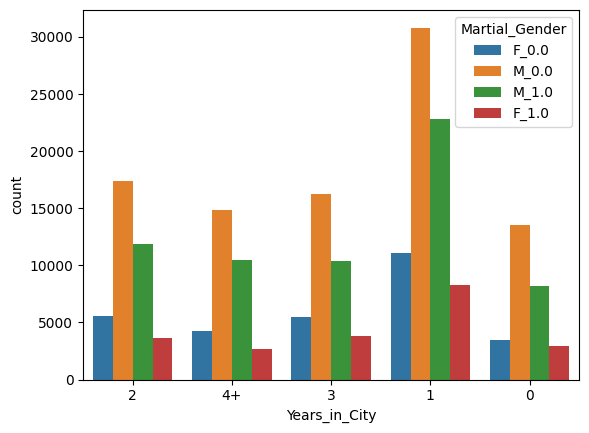

In [ ]:
sns.countplot(x = "Years_in_City",hue = "Martial_Gender",data=df)

The analysis shows that while the average price per purchase is nearly the same for both men and women, men make up the majority of purchases, contributing 75% of total purchases. This indicates that men are more frequent buyers and, as a result, spend more overall during the Black Friday sale. Despite the average spending being equal across genders, men’s higher purchase frequency leads to a larger contribution to total revenue. This highlights the immense contribution of men in driving sales. To boost overall sales, retailers can focus on increasing their offerings for men, given their higher presence and purchasing power. Additionally, to tap into the potential of the female segment, introducing new products tailored to women or creating targeted promotions could help encourage more purchases from women, motivating them to spend more. This dual approach of catering to men’s preferences while also incentivizing women’s participation could significantly enhance sales during future Black Friday events.

#analysing and looking which city have better selling and what product have better selling in specific city

<Axes: title={'center': 'city'}, ylabel='count'>

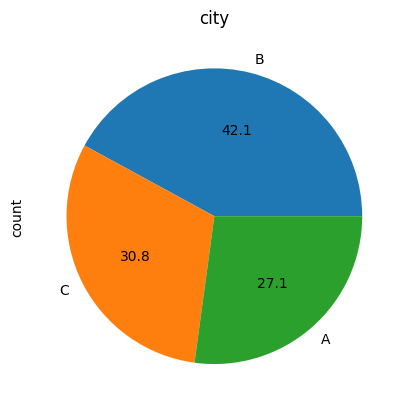

In [ ]:
df['City_Category'].value_counts().plot(kind="pie",autopct="%.1f") # city b have more purchases

<Axes: ylabel='Purchase'>

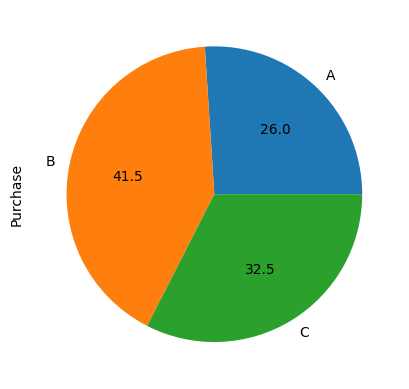

In [ ]:
df.groupby("City_Category")["Purchase"].sum().plot(kind="pie",autopct="%.1f")

<Axes: ylabel='Purchase'>

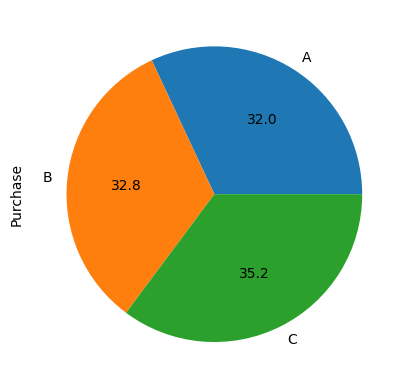

In [ ]:
df.groupby("City_Category")["Purchase"].mean().plot(kind="pie",autopct="%.1f")

This above 3 graphs shows that average price is almost same for all the cities means people buying thing at same price but due to more purchased in  city B people are spending more in city B.But in city A the mean is same but they are buying the same price but either people are buting less because of its small population or either there are only specific category of people who buying stuff at that price

<Axes: xlabel='Age', ylabel='count'>

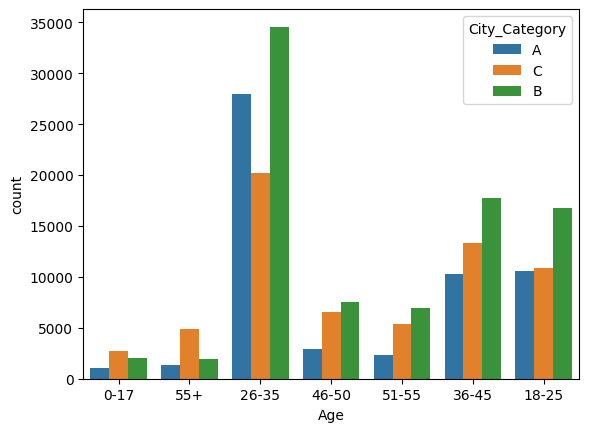

In [ ]:
sns.countplot(x="Age",hue="City_Category",data=df)

This make much more sense now either the mean is same City A have lower sales because in city have most A of population is from 26-35 who are buying the stuff whereas all other age category in city A is very less

<Axes: xlabel='Product_Category_1', ylabel='count'>

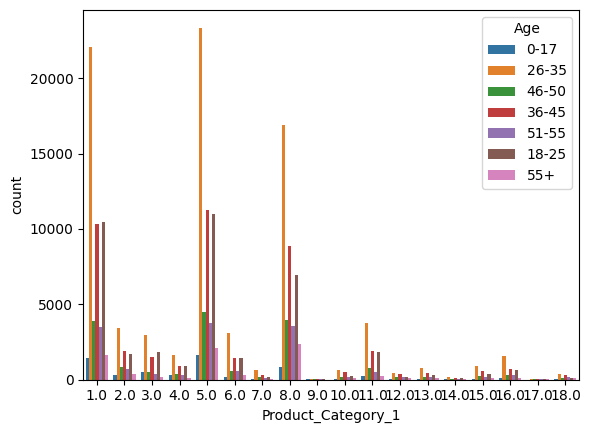

In [ ]:
sns.countplot(x="Product_Category_1",hue='Age',data=df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

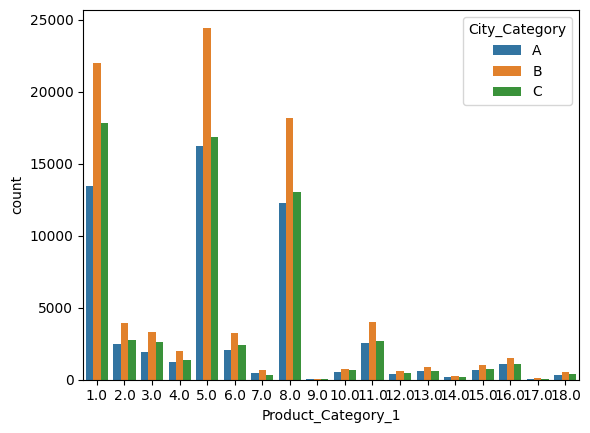

In [ ]:
sns.countplot(x='Product_Category_1',hue="City_Category",data=df)

Another prove is that the most selling product is category -'5.0' and that product is most buyied by age category - '26-35' and since this age category is more in category B an A thus making their purchases and spending higher . Also IN A spending is less thatn mean because most of the products are only being buyied by age category 26-35 in there which is majority thus moving the distribution to one side rather than being normal

<Axes: xlabel='City_Category', ylabel='count'>

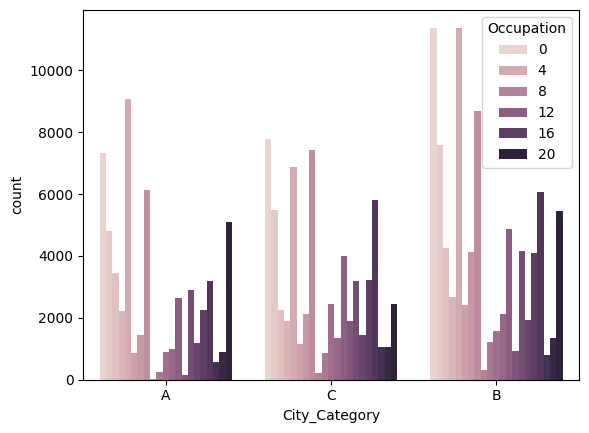

In [ ]:
sns.countplot(x="City_Category",hue="Occupation",data=df)